In [64]:
import sys
import pandas as pd


sys.path.append('..')

In [65]:
import rbf_functions

In [86]:
rbf = rbf_functions.squared_exponential_rbf.__name__
output_dir = f"../output/{rbf}/"

In [87]:
archives_by_nfe = pd.read_csv(output_dir + '10_hypervolume.csv')
archives_by_nfe.head()

,Unnamed: 0,Unnamed: 1,0,1,2,3,4,5
0,100,0,44.992592,0.550813,0.433861,0.318733,0.084848,1.0
1,100,1,60.084563,0.545179,0.371366,0.321381,0.086085,1.0
2,100,2,48.581955,0.413513,0.138717,0.391313,0.086462,1.0
3,100,3,63.179999,0.756636,0.624606,0.292943,0.093695,1.0
4,100,4,46.308510,0.461344,0.451983,0.351759,0.086511,1.0


we need to transform the dataframe back into platypus solution instances.

We need to have a collection of solutions for each generation


In [88]:
from platypus import Solution, Problem

n_rbfs = 4
n_objs = 6
n_vars = n_rbfs * 8 

problem = Problem(n_vars, n_objs)

# matters for hypervolume
problem.directions[0] = Problem.MAXIMIZE  # hydropower
problem.directions[1] = Problem.MAXIMIZE  # atomic power plant
problem.directions[2] = Problem.MAXIMIZE  # baltimore
problem.directions[3] = Problem.MAXIMIZE  # chester
problem.directions[4] = Problem.MINIMIZE  # environment
problem.directions[5] = Problem.MAXIMIZE  # recreation

archives = {}
for nfe, generation in archives_by_nfe.groupby("Unnamed: 0"):
    # we slice from 2, getting rid of the first two columns 
    # which contain the NFE and ID of each solution
    archive = []
    for i, row in generation.iloc[:, 2::].iterrows():
        solution = Solution(problem)
        solution.objectives = row
        archive.append(solution)
    archives[nfe] = archive
        


in this case our reference set is the final set of solutions (only a single seed). So let's load this data as well and turn it into a set of solution in the same way as we did with the archives.

In [89]:
data = pd.read_csv(output_dir + '10_solution.csv')

ref_set = []
for i, row in data.iterrows():
    solution = Solution(problem)
    solution.objectives = row
    ref_set.append(solution)


In [90]:
data

,hydropower,atomicpowerplant,baltimore,chester,environment,recreation
0,40.306107,0.270484,0.157828,0.189878,0.049489,1.0
1,79.696679,0.999570,0.916892,0.950486,0.099649,1.0


In [91]:
from platypus import Hypervolume

hv = Hypervolume(reference_set=ref_set)

nfes = []
hvs = []
for nfe, archive in archives.items():
    nfes.append(nfe)
    hvs.append(hv.calculate(archive))

PlatypusError: objective with empty range

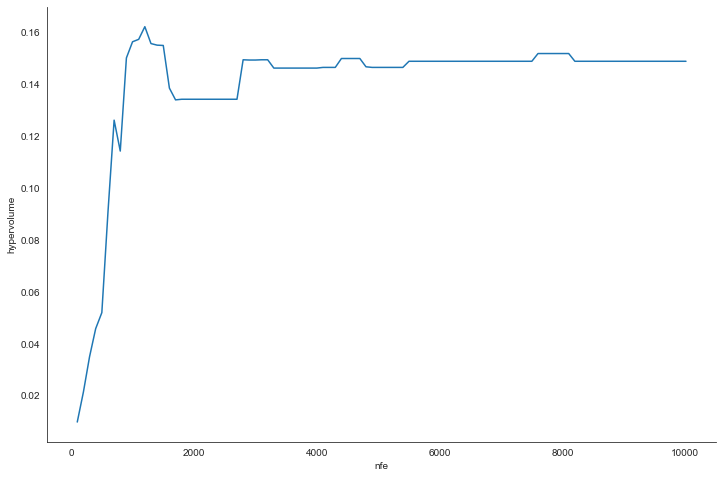

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

fig, ax = plt.subplots()

ax.plot(nfes, hvs)
ax.set_xlabel('nfe')
ax.set_ylabel('hypervolume')

sns.despine()

plt.show()

In [93]:
e_progress = pd.read_csv(output_dir + '10_convergence.csv')
e_progress

,Unnamed: 0,nfe,improvements
0,0,100,10
1,1,200,12
2,2,300,17
3,3,400,20
4,4,500,28
...,...,...,...
928,928,19957,103
929,929,19969,103
930,930,19981,103
931,931,19993,103


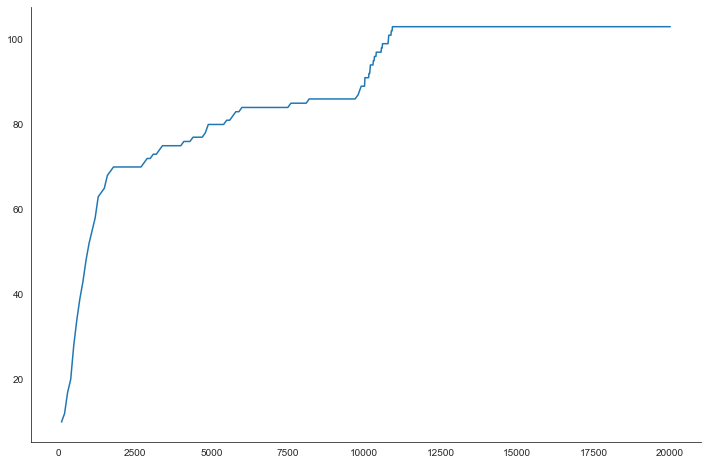

In [94]:
fig, ax = plt.subplots()
ax.plot(e_progress.nfe, e_progress.improvements)

sns.despine()

plt.show()